# Validation on synthetic data

### Table of contents

1. [**Visualize synthetic data**](#vis)
2. [**Plot validation on synthetic data figure**](#plot_syn)

In [2]:
import scipy.special as sps
import scipy.stats as scstats
import numpy as np

import torch

import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import transforms
import daft

    
import sys
sys.path.append("..")
from neuroprob import utils

sys.path.append("../scripts/") # access to scripts
import models

import pickle

<a id='vis'></a>
## Visualize synthetic data

In [13]:
modIP = np.load('../data/modIP1.npz')
hCMP = np.load('../data/hCMP1.npz')

In [14]:
covs = hCMP["covariates"][:, 0]
gt_lamb = hCMP["gt_lamb"]
gt_nu = hCMP["gt_nu"]

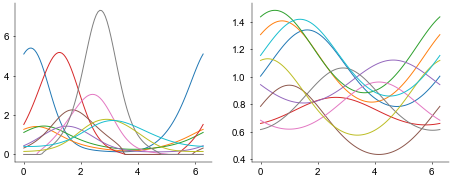

In [20]:
n = 6

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].plot(covs, gt_lamb[:30:3, :].T)
axes[1].plot(covs, gt_nu[:30:3, :].T)

plt.show()

In [3]:
data_path = '../data/'
data_type = 'hCMP1'
bin_size = 1

dataset_dict = models.get_dataset(data_type, bin_size, data_path)

In [5]:
dataset_dict

{'name': 'hCMP1',
 'covariates': {'hd': array([0.        , 0.41080907, 0.57602761, ..., 2.10426787, 1.71862794,
         1.81137006])},
 'spiketrains': array([[5., 3., 1., ..., 0., 0., 0.],
        [6., 2., 1., ..., 0., 2., 0.],
        [2., 3., 1., ..., 1., 0., 0.],
        ...,
        [4., 4., 1., ..., 0., 0., 0.],
        [3., 2., 1., ..., 0., 0., 0.],
        [1., 0., 1., ..., 2., 0., 0.]]),
 'neurons': 50,
 'metainfo': {},
 'tbin': 0.1,
 'timesamples': 10000,
 'max_count': 18,
 'bin_size': 1,
 'trial_sizes': None}